<a href="https://colab.research.google.com/github/Yaaxek/Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#0. Exploracion de datos

In [319]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


##Producto y Categoría: Artículos vendidos y sus calificaciones.
##Evaluación de compra: Comentarios de clientes.

In [320]:
producto_categoria=tienda[['Producto','Categoría del Producto','Calificación']]
producto_categoria

,Producto,Categoría del Producto,Calificación
0,Asistente virtual,Electrónicos,4
1,Mesa de comedor,Muebles,1
2,Juego de mesa,Juguetes,1
3,Microondas,Electrodomésticos,4
4,Silla de oficina,Muebles,5
...,...,...,...
2354,Iphone 15,Electrónicos,1
2355,Impresora,Electrónicos,5
2356,Juego de mesa,Juguetes,5
2357,Cama box,Muebles,1


##Precio y Envío: Valores de venta y costos asociados.

In [321]:
costos_asociados=tienda['Costos totales'] = tienda['Costo de envío'] + tienda['Precio']
tienda[['Producto','Precio','Costo de envío','Costos totales']]

,Producto,Precio,Costo de envío,Costos totales
0,Asistente virtual,164300.0,6900.0,171200.0
1,Mesa de comedor,192300.0,8400.0,200700.0
2,Juego de mesa,209600.0,15900.0,225500.0
3,Microondas,757500.0,41000.0,798500.0
4,Silla de oficina,335200.0,20200.0,355400.0
...,...,...,...,...
2354,Iphone 15,1284400.0,66600.0,1351000.0
2355,Impresora,282800.0,15300.0,298100.0
2356,Juego de mesa,122900.0,7200.0,130100.0
2357,Cama box,691300.0,35000.0,726300.0


##Fecha y ubicación de compra: Información temporal y geográfica.

In [322]:
tienda[['Fecha de Compra','Lugar de Compra'	]]

,Fecha de Compra,Lugar de Compra
0,16/01/2021,Bogotá
1,18/05/2022,Medellín
2,15/03/2021,Cartagena
3,03/05/2022,Cali
4,07/11/2020,Medellín
...,...,...
2354,15/11/2021,Medellín
2355,18/03/2023,Bogotá
2356,06/07/2021,Cali
2357,02/05/2022,Pasto


##Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

In [323]:
tienda[['Cantidad de cuotas','Método de pago']]

,Cantidad de cuotas,Método de pago
0,8,Tarjeta de crédito
1,4,Tarjeta de crédito
2,1,Tarjeta de crédito
3,1,Nequi
4,1,Nequi
...,...,...
2354,1,Nequi
2355,1,Nequi
2356,4,Tarjeta de crédito
2357,2,Tarjeta de crédito


##Coordenadas Geográficas: Ubicación de las transacciones.

In [324]:
tienda[['lat','lon']]

,lat,lon
0,4.60971,-74.08175
1,6.25184,-75.56359
2,10.39972,-75.51444
3,3.43722,-76.52250
4,6.25184,-75.56359
...,...,...
2354,6.25184,-75.56359
2355,4.60971,-74.08175
2356,3.43722,-76.52250
2357,1.21361,-77.28111


#1. Análisis de facturación



##Ingreso Total de cada tienda

In [325]:
ingreso=tienda['Precio'].sum(), tienda2['Precio'].sum(), tienda3['Precio'].sum(), tienda4['Precio'].sum()
ingreso

(np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0))

In [326]:
ingreso = pd.DataFrame(ingreso)
ingreso.rename(index={0:'Tienda1',1:'Tienda2',2:'Tienda3',3:'Tienda4'},inplace=True)
ingreso.rename(columns={0:'Ingreso Total'},inplace=True)
ingreso.head()

,Ingreso Total
Tienda1,1.150880e+09
Tienda2,1.116344e+09
Tienda3,1.098020e+09
Tienda4,1.038376e+09


In [346]:
diferencia=1.098020e+09-1.038376e+09
diferencia

59644000.0

# 2. Ventas por categoría

##Categorias mas/menos populares (mas vendidos)

In [327]:
populares=[tienda['Categoría del Producto'].value_counts(),tienda2['Categoría del Producto'].value_counts(),tienda3['Categoría del Producto'].value_counts(),tienda4['Categoría del Producto'].value_counts()]
populares=pd.DataFrame(populares)
populares.index = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
populares.head()

Categoría del Producto,Muebles,Electrónicos,Juguetes,Electrodomésticos,Deportes y diversión,Instrumentos musicales,Libros,Artículos para el hogar
Tienda1,465,448,324,312,284,182,173,171
Tienda2,442,422,313,305,275,224,197,181
Tienda3,499,451,315,278,277,177,185,177
Tienda4,480,451,338,254,277,170,187,201


In [328]:
top = {}
for tienda in populares.index:
    top[tienda] = populares.loc[tienda].nlargest(3)
df_top = pd.DataFrame(top)
display(df_top)

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338


In [353]:
menos = {}
for tienda in populares.index:
    menos[tienda] = populares.loc[tienda].nsmallest(3)
df_menos = pd.DataFrame(menos)
display(df_menos)

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187


##Precio promedio por categoria

In [372]:
tiendas_df = pd.concat([tienda.assign(store='Tienda1'),
                         tienda2.assign(store='Tienda2'),
                         tienda3.assign(store='Tienda3'),
                         tienda4.assign(store='Tienda4')])
precio_cat= tiendas_df.groupby(['store', 'Categoría del Producto'])['Precio'].mean().unstack()
precio_cat.drop(columns=['Deportes y diversión', 'Electrodomésticos'],inplace=True)
display(precio_cat)

Categoría del Producto,Artículos para el hogar,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
store,,,,,,
Tienda1,74259.649123,958690.848214,501642.857143,55542.283951,50779.768786,403513.333333
Tienda2,81474.585635,973533.412322,468706.696429,50943.769968,51224.365482,399154.524887
Tienda3,85084.745763,910811.086475,437180.225989,61590.793651,51344.324324,402950.100200
Tienda4,74997.512438,907929.268293,441778.823529,59947.337278,49846.524064,401101.875000


# 3. Calificación promedio de la tienda


## satisfacción del cliente

In [333]:
calificacion=tienda['Calificación'].mean(),tienda2['Calificación'].mean(),tienda3['Calificación'].mean(),tienda4['Calificación'].mean()
calificacion=pd.DataFrame(calificacion)
calificacion.rename(index={0:'Tienda1',1:'Tienda2',2:'Tienda3',3:'Tienda4'},inplace=True)
calificacion.rename(columns={0:'Calificacion promedio'},inplace=True)
calificacion.head()

,Calificacion promedio
Tienda1,3.976685
Tienda2,4.037304
Tienda3,4.048326
Tienda4,3.995759


# 4. Productos más y menos vendidos

In [334]:
vendido=[tienda['Producto'].value_counts(), tienda2['Producto'].value_counts(),tienda3['Producto'].value_counts(),tienda4['Producto'].value_counts()]
vendido=pd.DataFrame(vendido)
vendido.index = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
vendido.head()


Producto,Microondas,TV LED UHD 4K,Armario,Secadora de ropa,Mesa de noche,Bloques de construcción,Balón de baloncesto,Bicicleta,Vaso térmico,Refrigerador,...,Muñeca bebé,Mesa de comedor,Dinosaurio Rex,Cuerda para saltar,Mochila,Ciencia de datos con Python,Pandereta,Olla de presión,Auriculares con micrófono,Celular ABXY
Tienda1,60,60,60,58,56,56,55,54,54,54,...,40,40,40,40,39,39,36,35,33,33
Tienda2,62,45,54,57,44,54,42,45,47,49,...,48,34,42,50,45,43,58,44,44,41
Tienda3,36,42,49,45,55,35,50,52,38,50,...,39,56,46,53,36,46,51,47,39,44
Tienda4,48,40,34,40,55,54,50,45,48,38,...,48,55,47,43,43,38,52,46,42,39


In [335]:
max = {}
for tienda in vendido.index:
    max[tienda] = vendido.loc[tienda].nlargest(3)
df_max = pd.DataFrame(max)
display(df_max)

,Tienda1,Tienda2,Tienda3,Tienda4
Producto,,,,
Armario,60.0,NaN,NaN,NaN
Batería,NaN,61.0,NaN,NaN
Cama box,NaN,NaN,NaN,62.0
Cama king,NaN,NaN,56.0,56.0
Cubertería,NaN,NaN,NaN,59.0
Iniciando en programación,NaN,65.0,NaN,NaN
Kit de bancas,NaN,NaN,57.0,NaN
Mesa de comedor,NaN,NaN,56.0,NaN
Microondas,60.0,62.0,NaN,NaN


In [336]:
min = {}
for tienda in vendido.index:
    min[tienda] = vendido.loc[tienda].nsmallest(3)
df_min = pd.DataFrame(min)
display(df_min)

,Tienda1,Tienda2,Tienda3,Tienda4
Producto,,,,
Armario,NaN,NaN,NaN,34.0
Auriculares con micrófono,33.0,NaN,NaN,NaN
Bloques de construcción,NaN,NaN,35.0,NaN
Celular ABXY,33.0,NaN,NaN,NaN
Guitarra acústica,NaN,NaN,NaN,37.0
Guitarra eléctrica,NaN,NaN,NaN,33.0
Impresora,NaN,34.0,NaN,NaN
Juego de mesa,NaN,32.0,NaN,NaN
Mesa de comedor,NaN,34.0,NaN,NaN


# 5. Envío promedio por tienda

##El cliente paga el envío.

In [344]:
envio=(tienda['Costo de envío'].mean(),tienda2['Costo de envío'].mean(),tienda3['Costo de envío'].mean(),tienda4['Costo de envío'].mean())
envio=pd.DataFrame(envio)
envio.rename(index={0:'Tienda1',1:'Tienda2',2:'Tienda3',3:'Tienda4'},inplace=True)
envio.rename(columns={0:'Envio promedio'},inplace=True)
envio.head()

,Envio promedio
Tienda1,26018.609580
Tienda2,25216.235693
Tienda3,24805.680373
Tienda4,23459.457167


#**Informe final**

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

**Proposito del analisis:** Se busca identificar la tienda menos eficiente.
  

**Tienda con menor ingreso**

Como se puede observar la Tienda 4 es la de menor ingreso con una diferencia de su par mas cernaco (Tienda 3) de $59,644,000.

**Tiendas con mayor ingreso (De mayor a menor)**

1.   Tienda 1 ($1,150,880,000)

2.   Tienda 2 ($1,116,344,000)

3.   Tienda 3	($1,098,020,000)

4.   Tienda 4	($1,038,376,000)



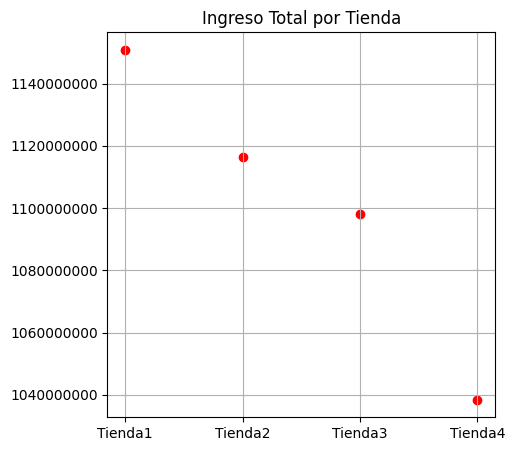

In [338]:
plt.figure(figsize=(5, 5))
plt.scatter(ingreso.index, ingreso['Ingreso Total'], color='red')
plt.title('Ingreso Total por Tienda')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

**Categorias mas vendidas por tienda**

Se puede observar que el top 3 mas populares en las 4 tiendas fueron:

1.   Muebles (Tienda 2 con menos ventas) **Categoria con ingreso medio**

2.   Electronicos (Tienda 2 con menos ventas) **Categoria con ingreso alto**

3.   Juguetes	(Tienda 2 con menos ventas) **Categoria con ingreso bajo**


**Categorias menos vendidas por tienda**

Se puede observar que el top 3 menos popular en las 4 tiendas fueron:

1.   Libros (Tienda 1 con menos ventas) **Categoria con ingreso bajo**

2.   Instrumentos musicales (Tienda 4 con menos ventas) **Categoria con ingreso medio**

3.   Articulos para el hogar	(Tienda 1 con menos ventas) **Categoria con ingreso bajo**

**Resumen**

Dentro de todas las categorias podemos ver que de las tiendas que mueven mas los productos es la Tienda 3, luego la Tienda 4, despues la Tienda 1 y por ultimo la que tiene menor venta es la Tienda 2.

En la categoria con mayor ingreso la **Tienda 2** tiene el menor numero de ventas, luego tenemos ingreso medio donde en muebles la **Tienda 2** tiene otra vez el menor numero de ventas y en instrumentos la **Tienda 4** tiene el menor numero de ventas.

Con esto podemos resumir que en esta categoria **la Tienda 2 es la que menos ganancias obtiene en las categoria que dan mas ingresos.**



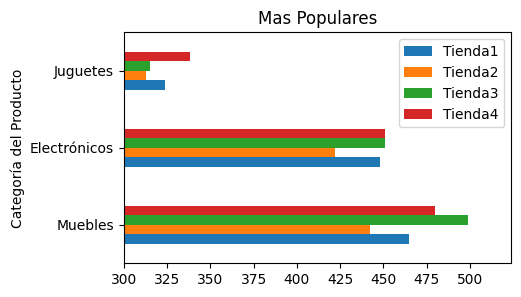

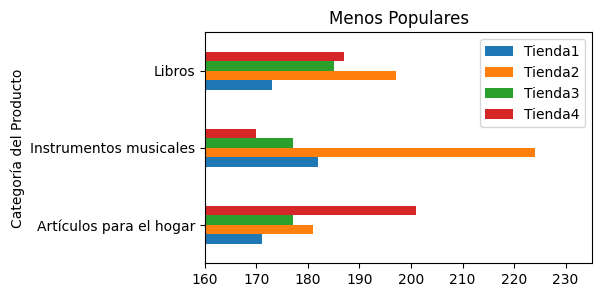

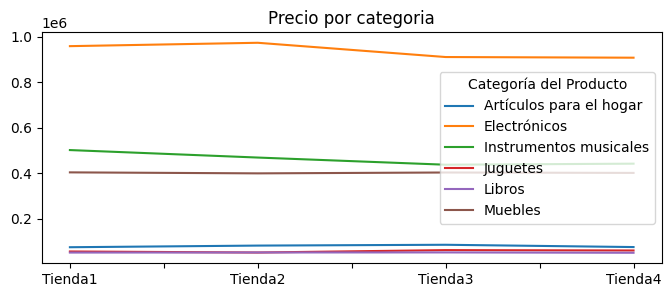

In [377]:
ax = df_top.plot(kind='barh', figsize=(5, 3), title='Mas Populares')
ax.set_xlim(300)
ax = df_menos.plot(kind='barh', figsize=(5, 3),title='Menos Populares')
ax.set_xlim(160)

ax=precio_cat.plot(kind='line', figsize=(8, 3), title='Precio por categoria',xlabel='')
plt.show()

**Producto mas vendido por tienda**

1.   Tienda 1 (Armario = Microondas = TV LED)

2.   Tienda 2 (Iniciando en programacion)

3.   Tienda 3	(Kit de bancas)

4.   Tienda 4	(Cama box)

**Producto menos vendido por tienda**

1.   Tienda 1 (Celular ABXY = Auriculares con micrófono)

2.   Tienda 2 (Juego de mesa)

3.   Tienda 3	(Bloques de construccion)

4.   Tienda 4	(Guitarra electrica)


**Resumen**

Tienda 1: Muestra un sólido desempeño con múltiples productos de gran venta que abarcan diferentes categorías (armario, microondas, televisor LED 4K UHD). Estos son generalmente artículos de alta demanda. Sus productos menos vendidos (teléfono celular ABXY, auriculares con micrófono) suelen ser productos electrónicos de bajo volumen, lo cual es previsible.


Tienda 2: Si bien cuenta con un producto único de gran venta ('Introducción a la programación'), sus ventas generales en categorías populares son las más bajas de todas las tiendas. Su producto menos vendido ('Juego de mesa') es un artículo de bajo valor. **Esto sugiere que la Tienda 2 podría no estar moviendo productos de alto volumen o alto valor de manera consistente,** lo que contribuye a su bajo desempeño en categorías de mayor ingreso.


Tienda 3: Demuestra un buen desempeño con 'Kit de banca' como un producto de gran venta, lo que indica éxito en artículos específicos de mobiliario. Su producto menos vendido ('Bloques de construcción') es un artículo típico de bajo volumen. En general, la Tienda 3 parece tener una buena combinación de productos y un buen volumen de ventas.


Tienda 4: Tiene un producto líder en ventas ('Cama box'), lo que probablemente contribuye significativamente a sus ingresos. Sin embargo, su producto menos vendido ('Guitarra eléctrica') indica que algunas áreas tienen un rendimiento inferior. **Dado que la Tienda 4 tiene los ingresos totales más bajos, esto sugiere que, si bien cuenta con algunos productos exitosos, su estrategia general de producto o el volumen de ventas de otros artículos podrían ser menos efectivos** en comparación con la Tienda 1 y la Tienda 3.



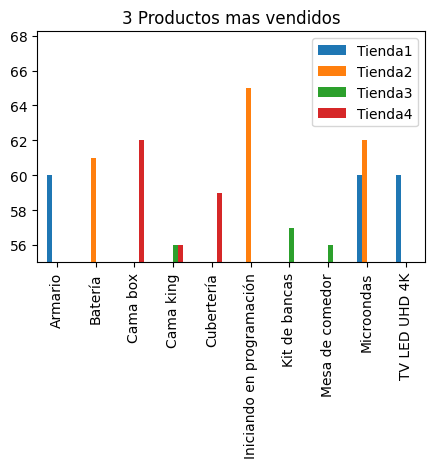

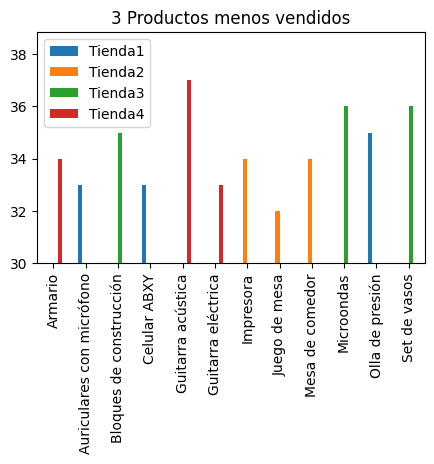

In [340]:
ax=df_max.plot(kind='bar', figsize=(5, 3), title='3 Productos mas vendidos',xlabel='')
ax.set_ylim(55)
ax=df_min.plot(kind='bar', figsize=(5, 3), title='3 Productos menos vendidos',xlabel='')
ax.set_ylim(30)
plt.show()

**Costo Promedio de Envio**

El análisis del costo de envío promedio por tienda revela lo siguiente (ordenado de menor a mayor costo):

* Tienda 4: Con el costo de envío promedio más bajo.

* Tienda 3: Ocupa el segundo lugar en términos de costo de envío promedio.

* Tienda 2: Tiene un costo de envío promedio ligeramente inferior a la Tienda 1.

* Tienda 1: Presenta el costo de envío promedio más alto.

**Resumen**

Aunque el costo de envío es absorbido por el cliente, este factor puede influir en la decisión de compra y, por lo tanto, en las ventas. Un costo de envío más bajo, como el de la Tienda 4 y 3, podría ser un punto a favor para los clientes. Mientras que un **costo de envio tan alto como en la Tienda 1 y 2** podria ser perjudicial y habla de problemas en la logistica.




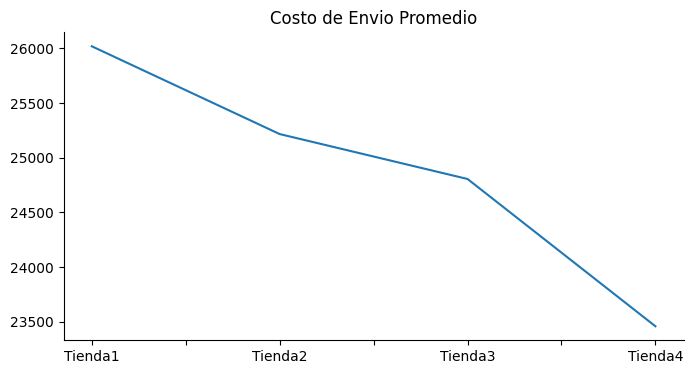

In [341]:
envio['Envio promedio'].plot(kind='line', figsize=(8, 4), title='Costo de Envio Promedio')
plt.gca().spines[['top', 'right']].set_visible(False)

**Satisfacción Promedio por Tienda**

El gráfico de pastel muestra la distribución de la satisfacción promedio de los clientes entre las cuatro tiendas. Podemos observar que la satisfacción es bastante uniforme entre todas, con ligeras variaciones:

* Tienda 1: 24.76%

* Tienda 2: 25.14%

* Tienda 3: 25.21%

* Tienda 4: 24.88%

Esto indica que no hay una diferencia significativa en la percepción general de satisfacción del cliente entre las tiendas. **La Tienda 3 tiene el porcentaje ligeramente más alto, seguida de la Tienda 2, Tienda 4 y finalmente Tienda 1,** pero todas se mantienen en un rango muy similar.

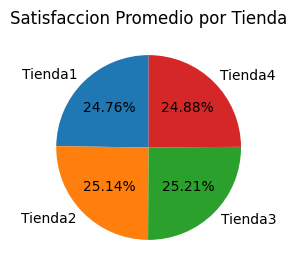

In [342]:
plt.figure(figsize=(3, 3))
plt.pie(calificacion['Calificacion promedio'], labels=calificacion.index, autopct='%1.2f%%', startangle=90)
plt.title('Satisfaccion Promedio por Tienda')
plt.ylabel('')
plt.show()

**Recomendacion**
Considerando todos los análisis de ingresos totales, ventas por categoría y producto, costos de envío y satisfacción del cliente, se recomienda al Sr. Juan **vender la Tienda 4.**

Aunque la satisfacción del cliente es uniformemente alta en todas las tiendas, y la Tienda 4 tiene el costo de envío más bajo, estos puntos positivos no logran compensar su desempeño financiero general.

La Tienda 4 es consistentemente la que registra el menor ingreso total y, a pesar de tener un producto líder de ventas como 'Cama box', su estrategia de producto o el volumen de ventas de otros artículos parecen ser menos efectivos en comparación con las otras tiendas.

Si bien la Tienda 2 también mostró debilidades significativas en las ventas de categorías de alto ingreso y tiene costos de envío elevados, la Tienda 4 se destaca como la opción menos eficiente financieramente, lo que la convierte en la principal candidata para la venta.